In [2]:
!pip install matplotlib

     |████████████████████████████████| 11.6MB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 102kB 57.0MB/s ta 0:00:01
     |████████████████████████████████| 2.2MB 93.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA

from embed_utils import MyVQC
from var_utils import MyRYRZ

In [2]:
from bc_utils_ver2 import *

In [33]:
import itertools
num_bits = 6

x_train = []
y_train = []

for comb in itertools.product('01', repeat=num_bits):
    comb = [int(x) for x in comb]
    x_train.append(comb)
    y_train.append(sum(comb) % 2)
#     y_train.append(int(comb[0]))
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [34]:
num_qubit = num_bits // 3
x_st = []
for x in x_train:
    x_st.append(''.join(x.astype(str)))
    
x_st = np.array(x_st)

In [35]:
x_st

array(['000000', '000001', '000010', '000011', '000100', '000101',
       '000110', '000111', '001000', '001001', '001010', '001011',
       '001100', '001101', '001110', '001111', '010000', '010001',
       '010010', '010011', '010100', '010101', '010110', '010111',
       '011000', '011001', '011010', '011011', '011100', '011101',
       '011110', '011111', '100000', '100001', '100010', '100011',
       '100100', '100101', '100110', '100111', '101000', '101001',
       '101010', '101011', '101100', '101101', '101110', '101111',
       '110000', '110001', '110010', '110011', '110100', '110101',
       '110110', '110111', '111000', '111001', '111010', '111011',
       '111100', '111101', '111110', '111111'], dtype='<U6')

In [36]:
from qiskit import QuantumCircuit

In [37]:
num_qubit

2

In [42]:
from quantum_utils import CustomFeatureMap
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA
from qiskit.providers.aer import QasmSimulator
from qiskit.aqua import QuantumInstance

import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

seed = 10598

vqc_ordinal_log = []
train_acc_log = []
def loss_history_callback(_, __, loss, ___, train_acc):
    
    vqc_ordinal_log.append(loss)
    train_acc_log.append(train_acc)

feature_map = QuantumCircuit(num_qubit) # Empty Circuit
var_form = MyRYRZ(num_qubit, depth=4)

training_input = {
    0: x_st[y_train == 0],
    1: x_st[y_train == 1]
}

qsvm = MyVQC(SPSA(300), feature_map, var_form, training_input, callback=loss_history_callback)

backend_options = {"method": "statevector_gpu"}
backend = QasmSimulator(backend_options)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)


result = qsvm.run(quantum_instance)

y_pred_train = qsvm.predict(x_st)[1]


# F1 score
acc_f1_train = (np.mean(y_pred_train == y_train), f1_score(y_train, y_pred_train))


# qsvm.save_model(f'models/titanic_QRAC_mapped_no13_implementation_fold_{ro}')


<ipython-input-42-9f0ecb3f9da5>:21: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
  var_form = MyRYRZ(num_qubit, depth=4)
<ipython-input-42-9f0ecb3f9da5>:28: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  qsvm = MyVQC(SPSA(300), feature_map, var_form, training_input, callback=loss_history_callback)
/home/napat-nii/qc_group_project/embed_utils.py:557: UserWarning: The feature map has no parameters that can be optimized t

2020-08-27 14:57:08,983:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:10,150:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:11,227:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:12,410:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:13,389:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:13,558:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 15 of 25
2020-08-27 14:57:14,350:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:15,524:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:57:16,478:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the N

2020-08-27 14:57:59,713:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: 0.7936986
2020-08-27 14:58:00,561:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:01,674:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:01,835:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 11: 0.7998966
2020-08-27 14:58:01,836:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 11: 0.7871841
2020-08-27 14:58:02,633:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:03,809:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:03,978:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 12: 0.8250783
2020-08-27 14:58:03,979:qiskit.aqua.componen

2020-08-27 14:58:37,876:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:38,846:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:39,249:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 28: 0.7327858
2020-08-27 14:58:39,250:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 28: 0.7512003
2020-08-27 14:58:40,067:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:41,130:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:58:41,301:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 29: 0.7242673
2020-08-27 14:58:41,301:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 29: 0.7521689
2020-08-27 14:58:42,322:qiskit.aqua.utils.ru

2020-08-27 14:59:16,863:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:17,031:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 45: 0.7240716
2020-08-27 14:59:17,032:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 45: 0.7241833
2020-08-27 14:59:18,009:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:18,988:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:19,154:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 46: 0.7306475
2020-08-27 14:59:19,155:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 46: 0.7453688
2020-08-27 14:59:19,954:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:21,106:qiskit.aqua.utils.ru

2020-08-27 14:59:54,225:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 62: 0.7088670
2020-08-27 14:59:54,226:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 62: 0.7055424
2020-08-27 14:59:55,109:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:56,636:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:56,809:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 63: 0.6573860
2020-08-27 14:59:56,810:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 63: 0.7269926
2020-08-27 14:59:57,630:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:58,789:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 14:59:58,961:qiskit.aqua.componen

2020-08-27 15:00:31,891:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 79: 0.6911487
2020-08-27 15:00:32,863:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:00:33,826:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:00:33,993:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 80: 0.6654398
2020-08-27 15:00:33,994:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 80: 0.7131431
2020-08-27 15:00:35,000:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:00:36,074:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:00:36,239:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 81: 0.6454915
2020-08-27 15:00:36,240:qiskit.aqua.componen

2020-08-27 15:01:09,926:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:11,102:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:11,270:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 97: 0.6557589
2020-08-27 15:01:11,271:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 97: 0.6663966
2020-08-27 15:01:12,090:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:13,256:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:13,425:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 98: 0.6469044
2020-08-27 15:01:13,426:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 98: 0.6568625
2020-08-27 15:01:14,243:qiskit.aqua.utils.ru

2020-08-27 15:01:49,032:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:49,200:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 114: 0.5198971
2020-08-27 15:01:49,201:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 114: 0.5109638
2020-08-27 15:01:50,017:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:51,449:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:51,612:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 115: 0.5119383
2020-08-27 15:01:51,613:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 115: 0.5144271
2020-08-27 15:01:52,394:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:01:53,660:qiskit.aqua.util

2020-08-27 15:02:27,598:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 131: 0.4615043
2020-08-27 15:02:27,598:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 131: 0.5791615
2020-08-27 15:02:28,459:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:02:29,673:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:02:29,904:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 132: 0.8697234
2020-08-27 15:02:29,906:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 132: 0.7073735
2020-08-27 15:02:30,731:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:02:31,787:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:02:31,958:qiskit.aqua.comp

2020-08-27 15:03:04,806:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 148: 0.7075435
2020-08-27 15:03:05,690:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:06,702:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:06,861:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 149: 0.6983304
2020-08-27 15:03:06,862:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 149: 0.7029315
2020-08-27 15:03:07,884:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:08,894:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:09,056:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 150: 0.7121305
2020-08-27 15:03:09,057:qiskit.aqua.comp

2020-08-27 15:03:43,589:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:44,587:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:44,757:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 166: 0.3360883
2020-08-27 15:03:44,758:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 166: 0.3765759
2020-08-27 15:03:45,778:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:46,749:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:03:47,149:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 167: 0.3361709
2020-08-27 15:03:47,150:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 167: 0.3534172
2020-08-27 15:03:47,968:qiskit.aqua.util

2020-08-27 15:04:22,312:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:04:22,478:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 183: 0.3055472
2020-08-27 15:04:22,479:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 183: 0.3110302
2020-08-27 15:04:23,342:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:04:24,537:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:04:24,701:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 184: 0.2952316
2020-08-27 15:04:24,701:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 184: 0.3202141
2020-08-27 15:04:25,532:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:04:26,771:qiskit.aqua.util

2020-08-27 15:05:00,481:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 200: 0.2999222
2020-08-27 15:05:00,482:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 200: 0.3066031
2020-08-27 15:05:01,326:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:02,464:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:02,628:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 201: 0.2909734
2020-08-27 15:05:02,629:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 201: 0.2934663
2020-08-27 15:05:03,449:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:04,647:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:04,812:qiskit.aqua.comp

2020-08-27 15:05:37,026:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 217: 0.2698999
2020-08-27 15:05:37,944:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:39,062:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:39,227:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 218: 0.2598816
2020-08-27 15:05:39,228:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 218: 0.2707365
2020-08-27 15:05:40,038:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:41,296:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:05:41,459:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 219: 0.2813937
2020-08-27 15:05:41,460:qiskit.aqua.comp

2020-08-27 15:06:14,746:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:15,742:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:15,896:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 235: 0.2421496
2020-08-27 15:06:15,897:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 235: 0.2544598
2020-08-27 15:06:16,848:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:17,784:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:17,955:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 236: 0.2445586
2020-08-27 15:06:17,956:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 236: 0.2455307
2020-08-27 15:06:18,954:qiskit.aqua.util

2020-08-27 15:06:51,934:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:52,099:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 252: 0.2284933
2020-08-27 15:06:52,100:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 252: 0.2116774
2020-08-27 15:06:53,071:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:54,215:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 253: 0.2226689
2020-08-27 15:06:54,216:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 253: 0.2234145
2020-08-27 15:06:55,049:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:56,104:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:06:56,272:qiskit.aqua.comp

2020-08-27 15:07:28,654:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 269: 0.1638298
2020-08-27 15:07:29,476:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:07:30,640:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:07:30,803:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 270: 0.1694336
2020-08-27 15:07:30,805:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 270: 0.1663635
2020-08-27 15:07:31,580:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:07:32,546:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:07:32,708:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 271: 0.1489213
2020-08-27 15:07:32,709:qiskit.aqua.comp

2020-08-27 15:08:06,110:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:08:07,062:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:08:07,217:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 287: 0.1117403
2020-08-27 15:08:07,218:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 287: 0.1207667
2020-08-27 15:08:08,174:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:08:09,134:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 15:08:09,296:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 288: 0.1314558
2020-08-27 15:08:09,297:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 288: 0.1017168
2020-08-27 15:08:10,261:qiskit.aqua.util

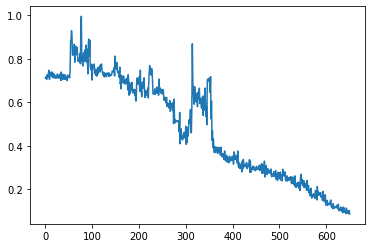

In [43]:
plt.plot(vqc_ordinal_log)

In [44]:
acc_f1_train

(1.0, 1.0)

In [50]:
for i in range(8):
    result['opt_params']

(52,)

In [53]:
mapping = {
            '000':0,
            '001':1,
            '010':2,
            '011':3,
            '100':4,
            '101':5,
            '110':6,
            '111':7
        }

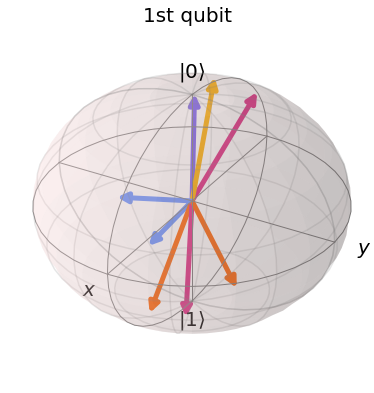

In [52]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

vectors = []
odds = ['001','010','100','111']
for odd in odds:
    theta = result['opt_params'][2*i]
    phi = result['opt_params'][2*i+1]
    vectors.append([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])

plot_bloch_vector(vectors, title="1st qubit")

In [30]:
qsvm.construct_circuit('110', np.array([2 for i in range(18)])).draw()

┌─────────────┐┌───────────┐┌───────────┐┌───────┐ ░  ░  ░  ░  ░  ░  ░  ░ »
q_0: ┤ circuit1023 ├┤ U3(2,2,0) ├┤ U3(2,0,0) ├┤ U1(2) ├─░──░──░──░──░──░──░──░─»
     └─────────────┘└───────────┘└───────────┘└───────┘ ░  ░  ░  ░  ░  ░  ░  ░ »
c_0: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ░ 
«q_0: ─░─
«      ░ 
«c_0: ═══
«

In [44]:
result

{'num_optimizer_evals': None,
 'min_val': 0.5136153235858316,
 'opt_params': array([-0.93708844, -3.05307024, -3.39536786, -6.20729495,  2.72791213,
         4.17536549, -2.26133191,  2.65852434,  1.99452056, -0.17574343,
         2.57636654, -2.43616345, -2.12489909,  0.00742505,  3.21982382,
        -1.60457892, -2.22016763, -3.51689789, -1.38351227,  3.15870132,
        -4.58867349,  0.06818234,  0.14570487,  4.13592778,  0.67214873,
        -3.97314604, -1.3567407 ,  0.13678001, -1.27824855,  2.60078556,
        -2.29449291, -0.77599605,  2.166544  ,  3.32912227,  2.59597286,
         1.05770581, -5.05728945,  0.9846406 ,  2.30504427,  0.67550717,
         0.22682823,  1.8679817 , -0.03941176, -4.0589281 ,  1.50312933,
        -2.78951348,  2.1863096 , -4.26811761, -0.17916239, -1.5931047 ,
         1.94774883,  2.13782603]),
 'eval_time': 231.22380137443542,
 'eval_count': 241,
 'training_loss': 0.5136153235858316,
 'predicted_probs': array([[0.63085938, 0.36914062],
        [0.17

In [45]:
np.mean(y_train == result['predicted_labels'])

0.828125

# Breast cancer

In [9]:
X_df, y_df = get_breast_cancer_data()
X, y = X_df.values, y_df.values

5-fold Random Forest Classification
Mean Accuracy: 71.65%
Mean F1 score: 40.90%
The four most important features are TUMOR-SIZE, BREAST-QUAD, DEG-MALIG and AGE respectively.


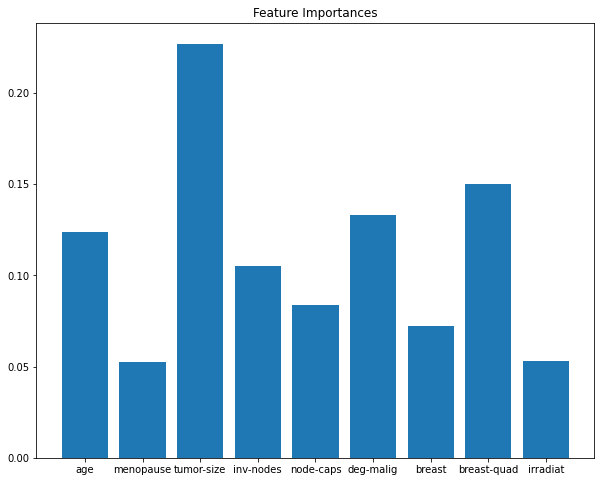

In [10]:
np.random.seed(123123)
selected_features_num = 4
_, __, feature_importances_list = kfold_randomforest(X, y)

# Feature selection from feature importances
selected_features = X_df.columns[sorted(range(X.shape[1]), key=lambda i: np.mean(feature_importances_list, axis=0)[i])[:-selected_features_num-1:-1]]
print('The four most important features are', ", ".join(selected_features[:-1]).upper() + f' and {selected_features[-1].upper()} respectively.')

# Visualize the feature importances
plt.figure(figsize=(10,8))
plt.bar(X_df.columns, np.mean(feature_importances_list, axis=0))
plt.title('Feature Importances')
plt.show()

In [11]:
import os
# Train VQC
def train_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer, \
              seed, \
              X_train, X_test, y_train, y_test, \
              fold_path, \
              positivedata_duplicate_ratio=1, \
              shots=1024,
              randomizer="standard_normal"):

    # Input preparation
    # Input dict
    training_input, test_input = get_input_dict_for_VQC(X_train, X_test, y_train, y_test, positivedata_duplicate_ratio)
    # Quantum instance
    quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)
    # Final zip file for temp models and its working model_foldername
#     wdir = '/'.join(model_filename.split('/')[:-1])
#     print('='*100 + f'\nWorking model_foldername: {wdir}\n' + '='*100)
#     os.chdir(wdir)
    temp_model_name = os.path.join(fold_path, 'temp.npz')
    final_model_filename = os.path.join(fold_path, 'final_model.npz')

    # Callback function for collecting models' parameters and losses along the way
    training_loss_list, validation_loss_list = [], []
    training_acc, validation_acc = [], []
    def callback_collector(eval_count, model_params, loss, ___, train_acc):
        # Collect training loss
        training_loss_list.append(loss)
        training_acc.append(train_acc)
        
        # Save a temp model
        temp_model_filename = os.path.join(fold_path, f'_evalcount{eval_count+1}.npz')
        np.savez(temp_model_filename, opt_params = model_params)
#         zip_obj.write(temp_model_filename, compress_type=ZIP_DEFLATED)
        # Load the temp model
        vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
        vqc_val.load_model(temp_model_filename)
#         os.remove(temp_model_filename)
        # Collect validation loss
        y_test_prob, y_pred = vqc_val.predict(X_test, quantum_instance)
        val_loss = -np.mean(y_test*np.log(y_test_prob[:,1]) + (1 - y_test)*np.log(y_test_prob[:,0]))
        validation_acc.append(np.mean(y_pred == y_test))
        validation_loss_list.append(val_loss)

    # Run VQC
    vqc = MyVQC(optimizer, feature_map, var_form, training_input, test_input, callback=callback_collector, randomizer=randomizer)
    vqc.random.seed(seed)
    result = vqc.run(quantum_instance)
    clear_output()
    print('Trained successfully!')
    vqc.save_model(final_model_filename)

    # Evaluate a final model
    y_train_pred, y_test_pred = vqc.predict(X_train, quantum_instance)[1], vqc.predict(X_test,  quantum_instance)[1]
    acc_train, f1_train = np.mean(y_train_pred==y_train), f1_score(y_train, y_train_pred)
    acc_test, f1_test = np.mean(y_test_pred==y_test), f1_score(y_test, y_test_pred)
    clear_output()
    print(f'Final accuracy (test set): {acc_test:.2%} | Final accuracy (training set): {acc_train:.2%}')
    print(f'Final F1 score (test set): {f1_test:.2%} | Final F1 score (training set): {f1_train:.2%}')
    print(f'Final model is saved at {final_model_filename}.\nTemp models are saved at {temp_model_name}.')

    result['Training losses'], result['Validation losses'] = np.array(training_loss_list), np.array(validation_loss_list)
    result['Training accuracy logs'], result['Validation accuracy logs'] = np.array(training_acc), np.array(validation_acc)
    result['Training F1 score'], result['Training accuracy'] = f1_train, acc_train
    result['Test F1 score'], result['Test accuracy'] = f1_test, acc_test

    return result

def kfold_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer_generator, \
              seed, \
              X, y, \
              model_foldername, \
              result_filename, \
              k=5, \
              positivedata_duplicate_ratio=1, \
              shots=1024, \
              seed_kfold=123123,
              randomizer="standard_normal"):

    print('='*100)
    print(f'{k}-fold VQC Classification')
#     print('='*100 + f'\nWorking model_foldername: {wdir}\n' + '='*100)
#     os.chdir(wdir)
    print(f"Model is saved at {model_foldername}")
    if not os.path.exists(model_foldername):
        os.makedirs(model_foldername)
    # Final result initialization (dict)
    params_to_collect = ['Training losses', 'Validation losses', \
                         'Training accuracy', 'Test accuracy', \
                         'Training F1 score', 'Test F1 score', \
                         'Training accuracy logs', 'Validation accuracy logs']
    result = {key:[] for key in params_to_collect}
    # result['Default test accuracies'] = [] # Uncomment for validating the predicted accuracy
    np.random.seed(seed_kfold)
    kf = KFold(n_splits=k, shuffle=True)
    kf_id = list(kf.split(X))
    for (fold, (train_id, test_id)) in enumerate(kf_id, start=1):
        fold_path = os.path.join(model_foldername, f"fold_{fold}")
        if not os.path.exists(fold_path):
            os.makedirs(fold_path)
        print('='*100 + f'\nFold number {fold}\n' + '='*100)
        # Split the data
        X_train, X_test, y_train, y_test = X[train_id], X[test_id], y[train_id], y[test_id]
        # Train a model
        optimizer = optimizer_generator()
        result_onefold = train_vqc(feature_map, \
                                var_form, \
                                backend, \
                                optimizer, \
                                seed, \
                                X_train, X_test, y_train, y_test, \
                                fold_path, \
                                positivedata_duplicate_ratio, \
                                shots,
                                  randomizer)
        # Save the trained model to the final zip file
        # Final model
        final_model_filename_fold = os.path.join(fold_path, f"final.npz")
        # Collect results
        for key in params_to_collect:
            result[key].append(result_onefold[key])

    # Average accuracies and f1 scores
    dict_items_without_meanvalues = list(result.items())
    for key, value in dict_items_without_meanvalues:
        result[key + ' (mean)'] = np.mean(value, axis=0)
    # Convert to numpy arrays
    for key, value in result.items():
        if type(value)==list:
            result[key] = np.array(value)
    # Save final results
    with open(result_filename, 'wb') as f:
        pickle.dump(result, f)
    clear_output()
    print('='*100)
    print('='*35 + f' {k}-fold VQC Classification ' + '='*35)
    print(f"Training accuracy (mean): {result['Training accuracy (mean)']:.2%} | Test accuracy (mean): {result['Test accuracy (mean)']:.2%}")
    print(f"Training F1 score (mean): {result['Training F1 score (mean)']:.2%} | Test F1 score (mean): {result['Test F1 score (mean)']:.2%}")
    print(f'All models are saved at {model_foldername}.\nResults are saved at {result_filename}.')
    print('='*100)

    return result

In [12]:
# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 1)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result_bc_depth1 = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/BC_self_learn_encoder_standard_4fold_depth1_model', \
                    'results/BC_self_learn_encoder_standard_4fold_depth1_results.pkl', \
                    k=4,
                    randomizer="standard_normal")

=================================== 4-fold VQC Classification ===================================
Training accuracy (mean): 72.14% | Test accuracy (mean): 66.07%
Training F1 score (mean): 55.79% | Test F1 score (mean): 48.92%
All models are saved at models/BC_self_learn_encoder_standard_4fold_depth1_model.
Results are saved at results/BC_self_learn_encoder_standard_4fold_depth1_results.pkl.


In [20]:
# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 1)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result_bc_depth1 = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/BC_self_learn_encoder_standard_4fold_depth1_model', \
                    'results/BC_self_learn_encoder_standard_4fold_depth1_results.pkl', \
                    k=4,
                    randomizer="standard_normal")

=================================== 4-fold VQC Classification ===================================
Training accuracy (mean): 72.14% | Test accuracy (mean): 66.07%
Training F1 score (mean): 55.79% | Test F1 score (mean): 48.92%
All models are saved at models/BC_self_learn_encoder_standard_4fold_depth1_model.
Results are saved at results/BC_self_learn_encoder_standard_4fold_depth1_results.pkl.


In [15]:
result_bc_depth1['Validation accuracy logs'][2]

array([0.46478873, 0.42253521, 0.46478873, 0.52112676, 0.50704225,
       0.46478873, 0.43661972, 0.45070423, 0.53521127, 0.3943662 ,
       0.3943662 , 0.54929577, 0.42253521, 0.49295775, 0.47887324,
       0.45070423, 0.46478873, 0.45070423, 0.49295775, 0.4084507 ,
       0.49295775, 0.46478873, 0.46478873, 0.46478873, 0.46478873,
       0.45070423, 0.47887324, 0.46478873, 0.47887324, 0.45070423,
       0.3943662 , 0.43661972, 0.36619718, 0.52112676, 0.47887324,
       0.4084507 , 0.42253521, 0.47887324, 0.46478873, 0.45070423,
       0.42253521, 0.46478873, 0.43661972, 0.52112676, 0.47887324,
       0.45070423, 0.46478873, 0.46478873, 0.49295775, 0.42253521,
       0.46478873, 0.47887324, 0.32394366, 0.4084507 , 0.56338028,
       0.54929577, 0.47887324, 0.53521127, 0.47887324, 0.50704225,
       0.46478873, 0.56338028, 0.6056338 , 0.5915493 , 0.6056338 ,
       0.53521127, 0.49295775, 0.49295775, 0.45070423, 0.52112676,
       0.35211268, 0.43661972, 0.42253521, 0.3943662 , 0.36619

In [20]:
# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/BC_self_learn_encoder_standard_4fold_model', \
                    'results/BC_self_learn_encoder_standard_4fold_results.pkl', \
                    k=4,
                    randomizer="standard_normal")

=================================== 4-fold VQC Classification ===================================
Training accuracy (mean): 74.13% | Test accuracy (mean): 66.05%
Training F1 score (mean): 58.89% | Test F1 score (mean): 47.03%
All models are saved at models/BC_self_learn_encoder_standard_4fold_model.
Results are saved at results/BC_self_learn_encoder_standard_4fold_results.pkl.


In [17]:
import pickle 
with open('results/BC_self_learn_encoder_standard_4fold_results.pkl', 'rb') as f:
    result_self_depth_4 = pickle.load(f)

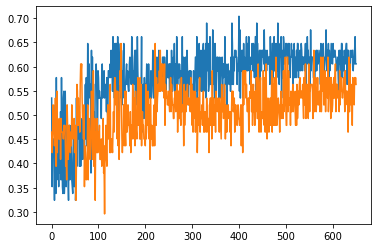

In [19]:
plt.plot(result_self_depth_4['Validation accuracy logs'][2])
plt.plot(result_bc_depth1['Validation accuracy logs'][2])

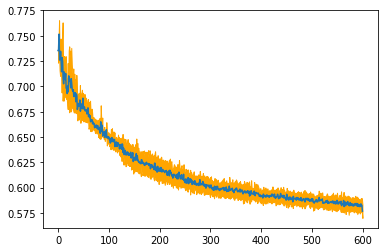

In [23]:
mean_epoch = result['Training losses (mean)'][-600:]
std_epoch = result['Training losses'].std(0)[-600:]
plt.plot(mean_epoch)
plt.fill_between(np.arange(len(mean_epoch)), mean_epoch - std_epoch, mean_epoch + std_epoch,color='orange')

In [24]:
result

{'Training losses': array([[0.69807502, 0.71570921, 0.70358365, ..., 0.57994493, 0.58065411,
         0.57615346],
        [0.67767458, 0.70345308, 0.6843727 , ..., 0.57304136, 0.57402308,
         0.56821165],
        [0.69655827, 0.71435784, 0.69439732, ..., 0.59112708, 0.59354446,
         0.5867012 ],
        [0.708903  , 0.73980536, 0.71922521, ..., 0.58538611, 0.58193408,
         0.57577713]]),
 'Validation losses': array([[0.73719165, 0.79644695, 0.72618384, ..., 0.63193219, 0.63521844,
         0.63926658],
        [0.78254781, 0.82484093, 0.77019402, ..., 0.59793863, 0.60793682,
         0.59562994],
        [0.73842355, 0.80143292, 0.75411647, ..., 0.64237005, 0.66821906,
         0.65630421],
        [0.71982234, 0.72690627, 0.71112163, ..., 0.67561861, 0.67670805,
         0.6736139 ]]),
 'Training accuracy': array([0.75233645, 0.75700935, 0.71627907, 0.73953488]),
 'Test accuracy': array([0.70833333, 0.70833333, 0.6056338 , 0.61971831]),
 'Training F1 score': array([0.561

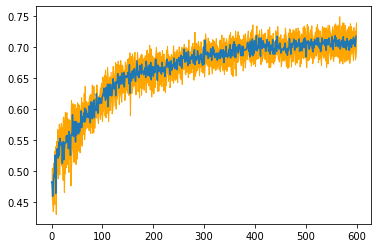

In [25]:
mean_epoch = result['Training accuracy logs (mean)'][-600:]
std_epoch = result['Training accuracy logs'].std(0)[-600:]
plt.plot(mean_epoch)
plt.fill_between(np.arange(len(mean_epoch)), mean_epoch - std_epoch, mean_epoch + std_epoch,color='orange')

In [68]:
result['Validation accuracy logs'].max(1)

array([0.72222222, 0.77777778, 0.70422535, 0.70422535])

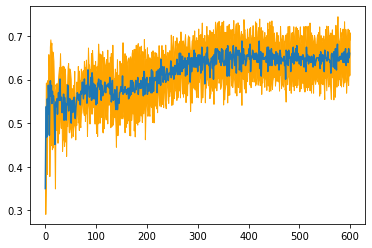

In [26]:
mean_epoch = result['Validation accuracy logs (mean)'][-600:]
std_epoch = result['Validation accuracy logs'].std(0)[-600:]
plt.plot(mean_epoch)
plt.fill_between(np.arange(len(mean_epoch)), mean_epoch - std_epoch, mean_epoch + std_epoch,color='orange')

In [73]:
with open('results/bc_qrac_record.pk', 'rb') as f:
    prev_result = pickle.load(f)

In [75]:
prev_result['acc_f1s_test']

[(0.6551724137931034, 0.4117647058823529),
 (0.7719298245614035, 0.6060606060606061),
 (0.6842105263157895, 0.47058823529411764),
 (0.631578947368421, 0.46153846153846156),
 (0.7719298245614035, 0.6486486486486486)]

In [76]:
prev_result['acc_f1s_train']

[(0.7236842105263158, 0.5655172413793104),
 (0.7030567685589519, 0.5211267605633804),
 (0.7336244541484717, 0.5611510791366906),
 (0.7248908296943232, 0.5467625899280576),
 (0.7336244541484717, 0.5547445255474452)]

In [22]:


# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result2 = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/BC_self_learn_encoder_uniform_4fold_model.zip', \
                    'results/BC_self_learn_encoder_uniform_4fold_results.pkl', \
                    k=4,
                    randomizer="uniform")

=================================== 4-fold VQC Classification ===================================
Training accuracy (mean): 70.04% | Test accuracy (mean): 63.68%
Training F1 score (mean): 55.03% | Test F1 score (mean): 44.71%
All models are saved at models/BC_self_learn_encoder_uniform_4fold_model.zip.
Results are saved at results/BC_self_learn_encoder_uniform_4fold_results.pkl.


In [27]:
weight = np.load("models/BC_self_learn_encoder_standard_4fold_model/fold_1/_evalcount549.npz")

In [31]:
list(weight.keys())

['opt_params']

In [35]:
weight['opt_params'][:16]

array([ 2.893871  ,  0.80750186,  0.14912082,  3.58729482, -1.48912869,
        1.43703101, -1.58219272, -1.44581974,  2.02536278,  3.8444152 ,
        4.1394547 ,  0.57034379, -0.83237965,  3.30782294,  2.51257891,
        1.79556947])

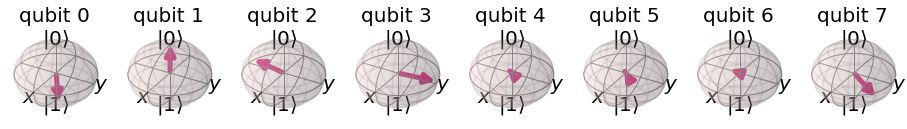

In [48]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector


sv = Statevector.from_label('00000000')
mycircuit = QuantumCircuit(8)
for idx in range(8):

    mycircuit.u3(weight['opt_params'][2*idx], weight['opt_params'][2*idx+1], 0, idx)
#     mycircuit.draw('mpl')

#     new_sv = sv.evolve(mycircuit)
#     states.append(new_sv.data)
    
# states = np.array(states)
new_sv = sv.evolve(mycircuit)
plot_bloch_multivector(new_sv.data, figsize=(5,20))

[autoreload of scipy.sparse.bsr failed: Traceback (most recent call last):
  File "/home/napat-nii/.pyenv/versions/3.8.0/envs/tf-quantum/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/napat-nii/.pyenv/versions/3.8.0/envs/tf-quantum/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/napat-nii/.pyenv/versions/3.8.0/envs/tf-quantum/lib/python3.8/site-p

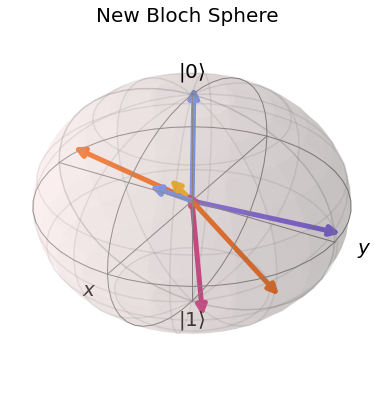

In [75]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

vectors = []
for i in range(0,8):
    theta = weight['opt_params'][2*i]
    phi = weight['opt_params'][2*i+1]
    vectors.append([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])

plot_bloch_vector(vectors, title="New Bloch Sphere")
# plot_bloch_vector([1,0,0], title="New Bloch Sphere")

# Titanic

In [23]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

from qiskit import BasicAer
from qiskit.providers.aer import QasmSimulator
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

from data_provider import load_titanic_pd
from utils import record_test_result_for_kaggle
from quantum_utils import CustomFeatureMap

from bc_utils_ver2 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df_train, df_test, y_train, _ = load_titanic_pd('train.csv', 'test.csv')

for col in df_train.columns:
    print(f"{col}: unique {len(df_train[col].unique())}")

from quantum_utils import select_features
mvp_col = select_features(df_train, y_train, feat_num=4)

/home/napat-nii/qc_group_project/data_provider.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = numer_map[df[col][i]]
/home/napat-nii/.pyenv/versions/3.8.0/envs/tf-quantum/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/napat-nii/.pyenv/versions/3.8.0/envs/tf-quantum/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/napat-nii/qc_group_project/data_provider.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

     Survived  Pclass Sex Age  SibSp  Parch  Fare Embarked
0           0       3   0   2      1      0     0        0
1           1       1   1   3      1      0     3        1
2           1       3   1   2      0      0     0        0
3           1       1   1   3      1      0     3        0
4           0       3   0   3      0      0     0        0
..        ...     ...  ..  ..    ...    ...   ...      ...
886         0       2   0   2      0      0     1        0
887         1       1   1   1      0      0     3        0
888         0       3   1   3      1      2     2        0
889         1       1   0   2      0      0     3        1
890         0       3   0   3      0      0     0        2

[891 rows x 8 columns]
Pclass: unique 3
Sex: unique 2
Age: unique 8
SibSp: unique 7
Parch: unique 7
Fare: unique 4
Embarked: unique 4
-----
Full features:
Final train score: 0.893378
Final F1 score: 0.853621
-----
Majority
Final train acc: 0.616162
Final train F1:0.000000
Feature rank based

In [25]:
df_train, df_test = df_train[mvp_col], df_test[mvp_col]

X_train = binary_encoder(df_train.values)
X_test = binary_encoder(df_test.values)

In [27]:
import os
from sklearn.model_selection import train_test_split, KFold
# from embed_utils import MyVQC, MyRYRZ
# Train VQC
def train_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer, \
              seed, \
              X_train, X_test, y_train, y_test, \
              fold_path, \
              positivedata_duplicate_ratio=1, \
              shots=1024,
              randomizer="standard_normal"):

    # Input preparation
    # Input dict
    training_input, test_input = get_input_dict_for_VQC(X_train, X_test, y_train, y_test, positivedata_duplicate_ratio)
    # Quantum instance
    quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)
    # Final zip file for temp models and its working model_foldername
#     wdir = '/'.join(model_filename.split('/')[:-1])
#     print('='*100 + f'\nWorking model_foldername: {wdir}\n' + '='*100)
#     os.chdir(wdir)
    temp_model_name = os.path.join(fold_path, 'temp.npz')
    final_model_filename = os.path.join(fold_path, 'final_model.npz')

    # Callback function for collecting models' parameters and losses along the way
    training_loss_list, validation_loss_list = [], []
    training_acc, validation_acc = [], []
    def callback_collector(eval_count, model_params, loss, ___, train_acc):
        # Collect training loss
        training_loss_list.append(loss)
        training_acc.append(train_acc)
        
        # Save a temp model
        temp_model_filename = os.path.join(fold_path, f'_evalcount{eval_count+1}.npz')
        np.savez(temp_model_filename, opt_params = model_params)
#         zip_obj.write(temp_model_filename, compress_type=ZIP_DEFLATED)
        # Load the temp model
        vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
        vqc_val.load_model(temp_model_filename)
#         os.remove(temp_model_filename)
        # Collect validation loss
        y_test_prob, y_pred = vqc_val.predict(X_test, quantum_instance)
        val_loss = -np.mean(y_test*np.log(y_test_prob[:,1]) + (1 - y_test)*np.log(y_test_prob[:,0]))
        validation_acc.append(np.mean(y_pred == y_test))
        validation_loss_list.append(val_loss)

    # Run VQC
    vqc = MyVQC(optimizer, feature_map, var_form, training_input, test_input, callback=callback_collector, randomizer=randomizer)
    vqc.random.seed(seed)
    result = vqc.run(quantum_instance)
    clear_output()
    print('Trained successfully!')
    vqc.save_model(final_model_filename)

    # Evaluate a final model
    y_train_pred, y_test_pred = vqc.predict(X_train, quantum_instance)[1], vqc.predict(X_test,  quantum_instance)[1]
    acc_train, f1_train = np.mean(y_train_pred==y_train), f1_score(y_train, y_train_pred)
    acc_test, f1_test = np.mean(y_test_pred==y_test), f1_score(y_test, y_test_pred)
    clear_output()
    print(f'Final accuracy (test set): {acc_test:.2%} | Final accuracy (training set): {acc_train:.2%}')
    print(f'Final F1 score (test set): {f1_test:.2%} | Final F1 score (training set): {f1_train:.2%}')
    print(f'Final model is saved at {final_model_filename}.\nTemp models are saved at {temp_model_name}.')

    result['Training losses'], result['Validation losses'] = np.array(training_loss_list), np.array(validation_loss_list)
    result['Training accuracy logs'], result['Validation accuracy logs'] = np.array(training_acc), np.array(validation_acc)
    result['Training F1 score'], result['Training accuracy'] = f1_train, acc_train
    result['Test F1 score'], result['Test accuracy'] = f1_test, acc_test

    return result

def kfold_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer_generator, \
              seed, \
              X, y, \
              model_foldername, \
              result_filename, \
              k=5, \
              positivedata_duplicate_ratio=1, \
              shots=1024, \
              seed_kfold=123123,
              randomizer="standard_normal"):

    print('='*100)
    print(f'{k}-fold VQC Classification')
    print(f"Model is saved at {model_foldername}")
    if not os.path.exists(model_foldername):
        os.makedirs(model_foldername)
    # Final result initialization (dict)
    params_to_collect = ['Training losses', 'Validation losses', \
                         'Training accuracy', 'Test accuracy', \
                         'Training F1 score', 'Test F1 score', \
                         'Training accuracy logs', 'Validation accuracy logs']
    result = {key:[] for key in params_to_collect}
    # result['Default test accuracies'] = [] # Uncomment for validating the predicted accuracy
    np.random.seed(seed_kfold)
    kf = KFold(n_splits=k, shuffle=True)
    kf_id = list(kf.split(X))
    for (fold, (train_id, test_id)) in enumerate(kf_id, start=1):
        fold_path = os.path.join(model_foldername, f"fold_{fold}")
        if not os.path.exists(fold_path):
            os.makedirs(fold_path)
        print('='*100 + f'\nFold number {fold}\n' + '='*100)
        # Split the data
        X_train, X_test, y_train, y_test = X[train_id], X[test_id], y[train_id], y[test_id]
        # Train a model
        optimizer = optimizer_generator()
        result_onefold = train_vqc(feature_map, \
                                var_form, \
                                backend, \
                                optimizer, \
                                seed, \
                                X_train, X_test, y_train, y_test, \
                                fold_path, \
                                positivedata_duplicate_ratio, \
                                shots,
                                  randomizer)
        # Save the trained model to the final zip file
        # Final model
        final_model_filename_fold = os.path.join(fold_path, f"final.npz")
        # Collect results
        for key in params_to_collect:
            result[key].append(result_onefold[key])

    # Average accuracies and f1 scores
    dict_items_without_meanvalues = list(result.items())
    for key, value in dict_items_without_meanvalues:
        result[key + ' (mean)'] = np.mean(value, axis=0)
    # Convert to numpy arrays
    for key, value in result.items():
        if type(value)==list:
            result[key] = np.array(value)
    # Save final results
    with open(result_filename, 'wb') as f:
        pickle.dump(result, f)
    clear_output()
    print('='*100)
    print('='*35 + f' {k}-fold VQC Classification ' + '='*35)
    print(f"Training accuracy (mean): {result['Training accuracy (mean)']:.2%} | Test accuracy (mean): {result['Test accuracy (mean)']:.2%}")
    print(f"Training F1 score (mean): {result['Training F1 score (mean)']:.2%} | Test F1 score (mean): {result['Test F1 score (mean)']:.2%}")
    print(f'All models are saved at {model_foldername}.\nResults are saved at {result_filename}.')
    print('='*100)

    return result

In [74]:
num_qubit = len(X_train[0]) // 3
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})
seed, epoch = 10598, 300
optimizer_gen = lambda :SPSA(epoch)

result = kfold_vqc(feature_map, 
          var_form, 
          backend, 
          optimizer_gen, 
          seed, 
          X_train, 
          y_train, 
          model_foldername="models/Titanic_self_learn_model", 
          result_filename="results/Titanic_self_learn_result.pkl",
          k=4, 
          positivedata_duplicate_ratio=1/3,
          randomizer="standard_normal")

=================================== 4-fold VQC Classification ===================================
Training accuracy (mean): 77.10% | Test accuracy (mean): 76.10%
Training F1 score (mean): 70.40% | Test F1 score (mean): 69.19%
All models are saved at models/Titanic_self_learn_model.
Results are saved at results/Titanic_self_learn_result.pkl.


In [76]:
result['Validation accuracy logs'].max(1)

array([0.79372197, 0.77578475, 0.77130045, 0.81531532])

In [84]:
idxs = result['Validation accuracy logs'].argmax(1)
result['Training accuracy logs'][np.arange(4),idxs]

array([0.77025232, 0.77333333, 0.70066225, 0.74437086])

In [85]:
result['Training accuracy logs'].max(1)

array([0.77689243, 0.79333333, 0.7602649 , 0.77880795])

In [80]:
result['Validation accuracy logs'][:,-1]

array([0.76681614, 0.76681614, 0.7309417 , 0.77927928])

In [28]:
# Depth 1

num_qubit = len(X_train[0]) // 3
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 1)
backend = QasmSimulator({"method": "statevector_gpu"})
seed, epoch = 10598, 300
optimizer_gen = lambda :SPSA(epoch)

result = kfold_vqc(feature_map, 
          var_form, 
          backend, 
          optimizer_gen, 
          seed, 
          X_train, 
          y_train, 
          model_foldername="models/Titanic_self_learn_depth1_model", 
          result_filename="results/Titanic_self_learn_depth1_result.pkl",
          k=4, 
          positivedata_duplicate_ratio=1/3,
          randomizer="standard_normal")

2020-08-27 03:56:08,565:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.14.2
Backend: 'qasm_simulator (None)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'swap', 'ccx', 'unitary', 'diagonal', 'initialize', 'cu1', 'cu2', 'cu3', 'cswap', 'mcx', 'mcy', 'mcz', 'mcu1', 'mcu2', 'mcu3', 'mcswap', 'multiplexer', 'kraus', 'roerror'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': 3}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None
<ipython-input-27-01465fb8245d>:51: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.cir

Final accuracy (test set): 76.68% | Final accuracy (training set): 76.05%
Final F1 score (test set): 68.67% | Final F1 score (training set): 63.96%
Final model is saved at models/Titanic_self_learn_depth1_model/fold_2/final_model.npz.
Temp models are saved at models/Titanic_self_learn_depth1_model/fold_2/temp.npz.
Fold number 3


2020-08-27 03:56:12,376:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
2020-08-27 03:56:15,739:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 03:56:20,071:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the V

2020-08-27 03:57:21,415:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_group_project/embed_utils.py:557: UserWarning: The feature map has no parameters that can be optimized to represent the data. This will most likely cause the VQC to fail.
  @property
2020-08-27 03:57:24,908:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 03:57:25,458:qiskit.aqua.components.optimizers.spsa:DEB

2020-08-27 03:58:26,961:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 03:58:31,294:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_group_project/embed_utils.py:557: UserWarning: The feature map has no parameters that can be optimized to represent the data. This will most likely cause the VQC to fail.
  @property
2020-08-27 03:58:34,660:qiskit.aqua.utils.run_circuits:INFO: Can't

2020-08-27 03:59:36,035:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 03:59:40,364:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_group_project/embed_utils.py:557: UserWarning: The feature map has no parameters that can be optimized to represent the data. This will most likely cause the VQC to fail.
  @property
2020-08-27 03:59:43,700:qiskit.aqua.utils.run_circuits:INFO: Can't

2020-08-27 04:00:46,103:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:00:50,398:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_group_project/embed_utils.py:557: UserWarning: The feature map has no parameters that can be optimized to represent the data. This will most likely cause the VQC to fail.
  @property
2020-08-27 04:00:53,892:qiskit.aqua.utils.run_circuits:INFO: Can't

2020-08-27 04:01:56,231:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:02:00,564:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_group_project/embed_utils.py:557: UserWarning: The feature map has no parameters that can be optimized to represent the data. This will most likely cause the VQC to fail.
  @property
2020-08-27 04:02:03,975:qiskit.aqua.utils.run_circuits:INFO: Can't

2020-08-27 04:03:06,533:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:03:07,082:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 1: 0.6709119
2020-08-27 04:03:07,083:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 1: 0.6718186
2020-08-27 04:03:10,984:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_gro

2020-08-27 04:04:09,165:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:04:09,944:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 5: 0.6573146
2020-08-27 04:04:09,945:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 5: 0.6585166
2020-08-27 04:04:13,571:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_gro

2020-08-27 04:05:11,711:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:05:12,263:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 9: 0.6571967
2020-08-27 04:05:12,264:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 9: 0.6276849
2020-08-27 04:05:16,341:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_gro

2020-08-27 04:06:14,791:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:06:15,346:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 13: 0.6216201
2020-08-27 04:06:15,347:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 13: 0.6208402
2020-08-27 04:06:19,083:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:07:17,703:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:07:18,254:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 17: 0.6096475
2020-08-27 04:07:18,255:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 17: 0.6132007
2020-08-27 04:07:21,873:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:08:21,012:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:08:21,564:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 21: 0.6107230
2020-08-27 04:08:21,565:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 21: 0.5857756
2020-08-27 04:08:25,615:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:09:25,165:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:09:25,720:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 25: 0.5800855
2020-08-27 04:09:25,721:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 25: 0.5791298
2020-08-27 04:09:29,572:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:10:28,089:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:10:28,640:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 29: 0.5759157
2020-08-27 04:10:28,641:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 29: 0.5805924
2020-08-27 04:10:32,299:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:11:30,589:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:11:31,140:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 33: 0.5710653
2020-08-27 04:11:31,141:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 33: 0.5764257
2020-08-27 04:11:34,826:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:12:32,902:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:12:33,460:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 37: 0.5694697
2020-08-27 04:12:33,461:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 37: 0.5696656
2020-08-27 04:12:37,416:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:13:35,698:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:13:36,249:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 41: 0.5690088
2020-08-27 04:13:36,250:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 41: 0.5689335
2020-08-27 04:13:39,941:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:14:38,002:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:14:38,554:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 45: 0.5573849
2020-08-27 04:14:38,555:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 45: 0.5749215
2020-08-27 04:14:42,181:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:15:40,814:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:15:41,374:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 49: 0.5668208
2020-08-27 04:15:41,375:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 49: 0.5526263
2020-08-27 04:15:45,175:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:16:44,133:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:16:44,691:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 53: 0.5601171
2020-08-27 04:16:44,691:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 53: 0.5451989
2020-08-27 04:16:48,649:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:17:46,662:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:17:47,214:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 57: 0.5476109
2020-08-27 04:17:47,215:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 57: 0.5490134
2020-08-27 04:17:50,856:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:18:48,666:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:18:49,220:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 61: 0.5465427
2020-08-27 04:18:49,221:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 61: 0.5490802
2020-08-27 04:18:52,964:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:19:51,467:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:19:52,021:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 65: 0.5470694
2020-08-27 04:19:52,022:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 65: 0.5481005
2020-08-27 04:19:55,624:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:20:53,183:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:20:53,735:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 69: 0.5425796
2020-08-27 04:20:53,736:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 69: 0.5487717
2020-08-27 04:20:57,519:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:21:55,377:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:21:55,934:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 73: 0.5445335
2020-08-27 04:21:55,935:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 73: 0.5452408
2020-08-27 04:21:59,817:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:22:58,986:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:22:59,543:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 77: 0.5449622
2020-08-27 04:22:59,544:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 77: 0.5413895
2020-08-27 04:23:03,213:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:24:01,114:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:24:01,673:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 81: 0.5495331
2020-08-27 04:24:01,674:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 81: 0.5352483
2020-08-27 04:24:05,419:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:25:03,543:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:25:04,095:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 85: 0.5375192
2020-08-27 04:25:04,096:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 85: 0.5454765
2020-08-27 04:25:07,784:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:26:06,091:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:26:06,635:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 89: 0.5375198
2020-08-27 04:26:06,636:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 89: 0.5394892
2020-08-27 04:26:10,653:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:27:08,150:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:27:08,702:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 93: 0.5364352
2020-08-27 04:27:08,703:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 93: 0.5395910
2020-08-27 04:27:12,475:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:28:10,075:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:28:10,628:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 97: 0.5362058
2020-08-27 04:28:10,629:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 97: 0.5345227
2020-08-27 04:28:14,253:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc_g

2020-08-27 04:29:11,581:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:29:12,134:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 101: 0.5321423
2020-08-27 04:29:12,135:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 101: 0.5423424
2020-08-27 04:29:16,055:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:30:13,912:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:30:14,471:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 105: 0.5359671
2020-08-27 04:30:14,472:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 105: 0.5355455
2020-08-27 04:30:18,216:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:31:15,799:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:31:16,355:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 109: 0.5342618
2020-08-27 04:31:16,356:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 109: 0.5320739
2020-08-27 04:31:20,200:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:32:17,994:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:32:18,546:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 113: 0.5342029
2020-08-27 04:32:18,547:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 113: 0.5322035
2020-08-27 04:32:22,327:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:33:20,374:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:33:20,929:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 117: 0.5282658
2020-08-27 04:33:20,930:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 117: 0.5337512
2020-08-27 04:33:24,625:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:34:21,635:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:34:22,191:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 121: 0.5326738
2020-08-27 04:34:22,192:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 121: 0.5329695
2020-08-27 04:34:25,819:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:35:24,536:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:35:25,095:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 125: 0.5310563
2020-08-27 04:35:25,096:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 125: 0.5313815
2020-08-27 04:35:28,764:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:36:26,762:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:36:27,313:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 129: 0.5335088
2020-08-27 04:36:27,314:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 129: 0.5287530
2020-08-27 04:36:31,139:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:37:29,551:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:37:30,103:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 133: 0.5348650
2020-08-27 04:37:30,104:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 133: 0.5268332
2020-08-27 04:37:34,125:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:38:32,150:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:38:32,710:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 137: 0.5258850
2020-08-27 04:38:32,711:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 137: 0.5292868
2020-08-27 04:38:36,687:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:39:35,166:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:39:35,721:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 141: 0.5324178
2020-08-27 04:39:35,722:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 141: 0.5291027
2020-08-27 04:39:39,373:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:40:38,108:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:40:38,663:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 145: 0.5281130
2020-08-27 04:40:38,664:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 145: 0.5296207
2020-08-27 04:40:42,671:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:41:40,718:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:41:41,276:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 149: 0.5275934
2020-08-27 04:41:41,277:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 149: 0.5335372
2020-08-27 04:41:44,928:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:42:42,711:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:42:43,259:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 153: 0.5297465
2020-08-27 04:42:43,260:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 153: 0.5269819
2020-08-27 04:42:46,868:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:43:45,000:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:43:45,555:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 157: 0.5278961
2020-08-27 04:43:45,556:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 157: 0.5294151
2020-08-27 04:43:49,251:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:44:47,818:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:44:48,371:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 161: 0.5303590
2020-08-27 04:44:48,372:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 161: 0.5260009
2020-08-27 04:44:52,302:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:45:50,051:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:45:50,602:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 165: 0.5287970
2020-08-27 04:45:50,603:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 165: 0.5253424
2020-08-27 04:45:54,370:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:46:51,518:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:46:52,071:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 169: 0.5270626
2020-08-27 04:46:52,072:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 169: 0.5275460
2020-08-27 04:46:55,713:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:47:54,000:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:47:54,555:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 173: 0.5264529
2020-08-27 04:47:54,556:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 173: 0.5271270
2020-08-27 04:47:58,328:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:48:55,971:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:48:56,596:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 177: 0.5231038
2020-08-27 04:48:56,597:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 177: 0.5267307
2020-08-27 04:49:00,434:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:49:59,850:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:50:00,402:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 181: 0.5248850
2020-08-27 04:50:00,403:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 181: 0.5250302
2020-08-27 04:50:04,110:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:51:02,072:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:51:02,622:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 185: 0.5256997
2020-08-27 04:51:02,623:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 185: 0.5264469
2020-08-27 04:51:06,335:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:52:04,633:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:52:05,185:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 189: 0.5237021
2020-08-27 04:52:05,186:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 189: 0.5281464
2020-08-27 04:52:08,821:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:53:06,975:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:53:07,529:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 193: 0.5231132
2020-08-27 04:53:07,530:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 193: 0.5271706
2020-08-27 04:53:11,672:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:54:09,920:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:54:10,470:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 197: 0.5232418
2020-08-27 04:54:10,471:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 197: 0.5259286
2020-08-27 04:54:14,125:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:55:12,016:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:55:12,566:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 201: 0.5231047
2020-08-27 04:55:12,567:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 201: 0.5252212
2020-08-27 04:55:16,286:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:56:14,615:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:56:15,341:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 205: 0.5230336
2020-08-27 04:56:15,342:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 205: 0.5256104
2020-08-27 04:56:18,899:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:57:17,350:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:57:17,898:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 209: 0.5284599
2020-08-27 04:57:17,898:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 209: 0.5227424
2020-08-27 04:57:21,536:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:58:19,540:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:58:20,095:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 213: 0.5256145
2020-08-27 04:58:20,096:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 213: 0.5219329
2020-08-27 04:58:23,788:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 04:59:22,741:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 04:59:23,294:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 217: 0.5260029
2020-08-27 04:59:23,295:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 217: 0.5239770
2020-08-27 04:59:27,364:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:00:24,773:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:00:25,327:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 221: 0.5263890
2020-08-27 05:00:25,328:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 221: 0.5242479
2020-08-27 05:00:29,474:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:01:27,963:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:01:28,515:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 225: 0.5247120
2020-08-27 05:01:28,515:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 225: 0.5216768
2020-08-27 05:01:32,452:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:02:30,182:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:02:30,732:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 229: 0.5238679
2020-08-27 05:02:30,733:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 229: 0.5210009
2020-08-27 05:02:34,739:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:03:33,780:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:03:34,335:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 233: 0.5221668
2020-08-27 05:03:34,336:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 233: 0.5250651
2020-08-27 05:03:38,085:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:04:35,877:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:04:36,424:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 237: 0.5224031
2020-08-27 05:04:36,425:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 237: 0.5213908
2020-08-27 05:04:40,416:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:05:37,399:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:05:37,958:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 241: 0.5215160
2020-08-27 05:05:37,959:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 241: 0.5233459
2020-08-27 05:05:41,760:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:06:40,472:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:06:41,023:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 245: 0.5232027
2020-08-27 05:06:41,025:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 245: 0.5220678
2020-08-27 05:06:44,735:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:07:42,976:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:07:43,527:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 249: 0.5217996
2020-08-27 05:07:43,528:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 249: 0.5200838
2020-08-27 05:07:47,318:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

2020-08-27 05:08:46,050:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-27 05:08:46,606:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 253: 0.5220538
2020-08-27 05:08:46,607:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 253: 0.5207535
2020-08-27 05:08:50,345:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-27-01465fb8245d>:41: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
/home/napat-nii/qc

In [29]:
result

{'Training losses': array([[0.93395834, 0.88550474, 0.93168402, ..., 0.50279122, 0.50716894,
         0.50366803],
        [0.88243791, 0.84560257, 0.88605304, ..., 0.5182873 , 0.52434777,
         0.51913591],
        [0.93382691, 0.87642097, 0.93341107, ..., 0.51583842, 0.52174206,
         0.51691384],
        [0.95184412, 0.89889699, 0.95036741, ..., 0.50106533, 0.50676602,
         0.50245071]]),
 'Validation losses': array([[0.82798713, 0.80439208, 0.82655701, ..., 0.49478712, 0.49862149,
         0.49519263],
        [0.96646116, 0.91389895, 0.95306484, ..., 0.50754142, 0.50903629,
         0.50745909],
        [0.83590844, 0.83978791, 0.83108304, ..., 0.504225  , 0.50655896,
         0.50329352],
        [0.78054284, 0.75988383, 0.77062158, ..., 0.51912311, 0.52932834,
         0.52301125]]),
 'Training accuracy': array([0.76497006, 0.76047904, 0.76646707, 0.77578475]),
 'Test accuracy': array([0.78026906, 0.76681614, 0.78923767, 0.74774775]),
 'Training F1 score': array([0.665

In [30]:
np.mean(result['Test accuracy (mean)'])

0.7710176544257261

In [32]:
np.mean(result['Training accuracy (mean)'])

0.7669252302569749